<a href="https://colab.research.google.com/github/itishajain15/Gemstone-Price-EDA/blob/main/Gemstone_Price_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: Perform explanatory data analysis, univariate and multivariate analysis.

Data Dictionary: Variable Name : Description

* Unnamed 0
* Carat:Carat weight of the cubic zirconia. 
* Cut: Describe the cut quality of the cubic zirconia. 
* Quality is increasing order Fair, Good, Very Good,Premium,Ideal. 
* Color: Colour of the cubic zirconia.With D being the best and J the worst. 
* Clarity :cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
* Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. 
* Price : the Price of the cubic zirconia. 
* X : Length of the cubic zirconia in mm.
* Y : Width of the cubic zirconia in mm.
* Z : Height of the cubic zirconia in mm.

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading file
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/cubic_zirconia.csv')

In [ ]:
#Checking first five records
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
#Checking last five records
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [ ]:
# Checking random five rows
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
6168,6169,0.52,Premium,H,VS1,61.4,57.0,5.27,5.16,3.20,1577
6338,6339,1.33,Very Good,F,SI1,63.3,56.0,6.91,6.95,4.39,8163
2033,2034,1.51,Very Good,H,VS1,61.8,59.0,7.27,7.32,4.51,11161
7195,7196,0.87,Very Good,J,SI1,63.1,60.0,6.03,5.96,3.78,2379
24212,24213,0.41,Ideal,E,VVS2,62.3,56.0,4.78,4.75,2.97,1243


In [ ]:
# Checking the shape of the dataset.
df.shape

(26967, 11)

In [ ]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
#Column names
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

**Inferences**
*  The data set contains 26967 rows and  11 columns .
*  In the given data set there are 2 Integer type features(price and unnamed),6 Float type features ( 'carat',  'depth', 'table', 'x', 'y', 'z'), 3 Object type features ('cut', 'color', 'clarity'). 
* 'price' is the target variable and all other are independent variable.
*  The first column is an index ("Unnamed: 0")as this  is only serial no, we can remove it.
* Except depth, in all the columns non-null count is 26967.

In [ ]:
#Creating copy of the Dataset
df1=df.copy()

In [ ]:
# Dropping  the serial no column as it is of no use
df1.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

DATA PREPROCESSING

In [ ]:
# Checking for null values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

Inference
* The depth column has 697 null values.

In [ ]:
# Imputing missing values

df1['depth'].median()

61.8

In [ ]:
# Replacing the missing values with median value. 

df1 = df1.fillna(df1['depth'].median())

In [ ]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
# Checking for duplicate records in the dataset
duplicate = df1.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
print(df1.shape)

Number of duplicate rows = 34
(26967, 10)


In [ ]:
#Dropping Duplicate values
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26967, 10)
After (26933, 10)


In [ ]:
duplicates = df1.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


In [ ]:
# Getting the summary statistics of the dataset
df1.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


Inference 
* On the given data set the the mean and median values does not have much difference. We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries.

In [ ]:
# Checking for the values which are equal to zero.
print("Number of rows with x = 0 is ",((df1.x==0).sum()))
print("Number of rows with y = 0 is ",((df1.y==0).sum()))
print("Number of rows with z = 0 is ",((df1.z==0).sum()))
print("Number of rows with depth = 0 is",((df1.depth==0).sum()))

Number of rows with x = 0 is  2
Number of rows with y = 0 is  2
Number of rows with z = 0 is  8
Number of rows with depth = 0 is 0


In [ ]:
#Dropping dimentionless diamonds
df1 = df1.drop(df1[df1["x"]==0].index)
df1 = df1.drop(df1[df1["y"]==0].index)
df1 = df1.drop(df1[df1["z"]==0].index)
df1.shape

(26925, 10)

## **Exploratory Data Analysis**

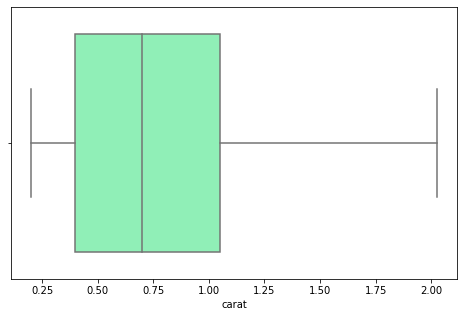

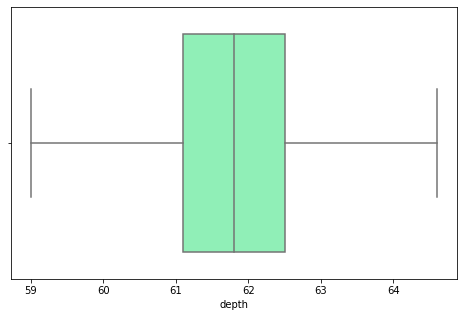

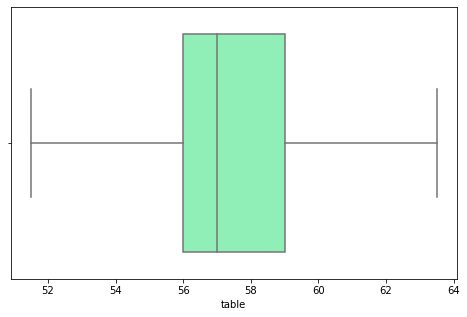

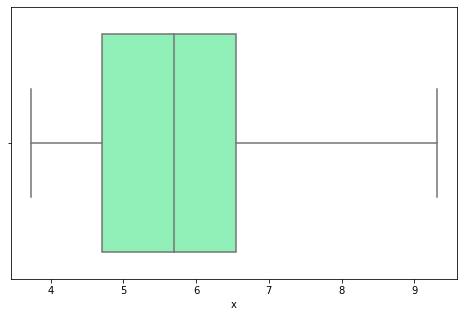

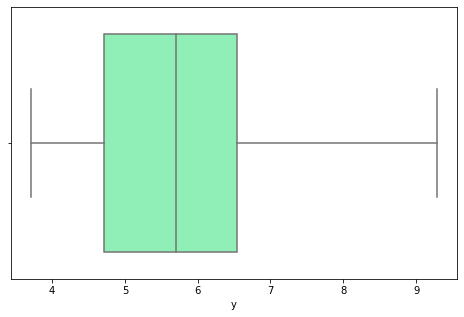

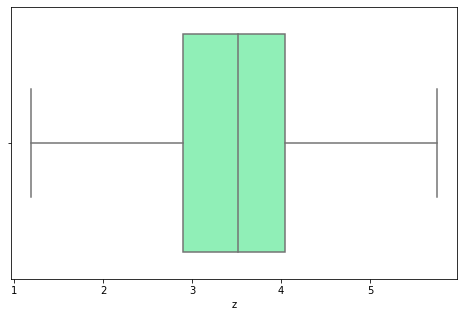

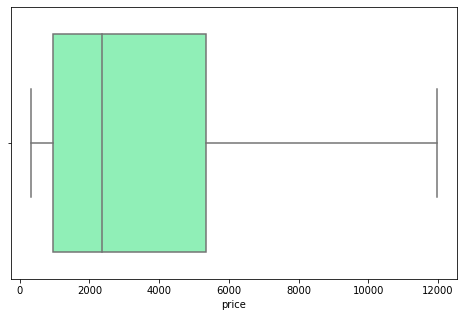

In [ ]:
#checking for outliers
columns= df1[cols].columns
for i in columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df1[i],whis=1.5,palette='rainbow')
    plt.show();

Inference
* There are outliers in all the columns.

In [ ]:
# Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df1[cols].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

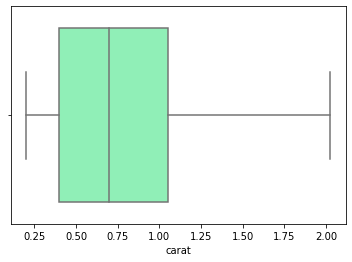

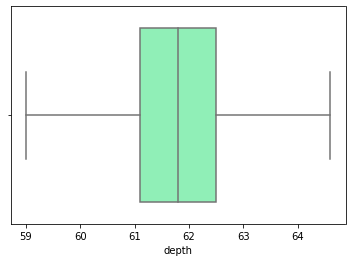

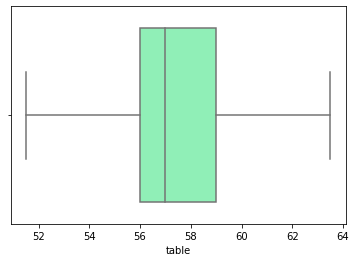

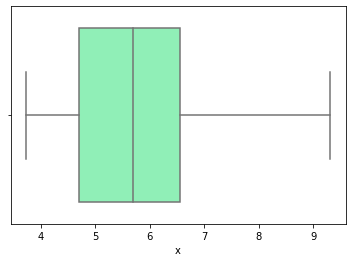

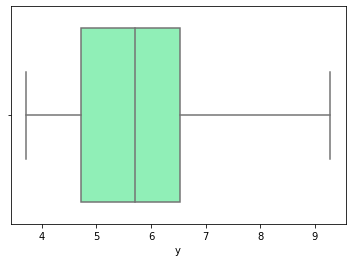

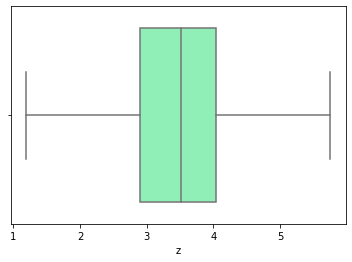

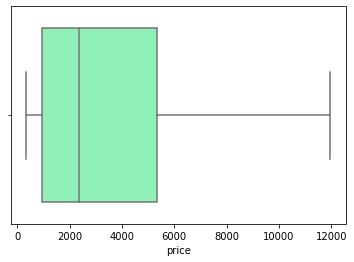

In [ ]:
cols = df1[cols].columns
for i in cols:
    sns.boxplot(df1[i],whis=1.5,palette='rainbow')
    plt.show();


In [ ]:
df1.shape

(26925, 10)

Inference
* For removing the outliers only 42 rows has been dropped.

## **Univariate Alanlysis**

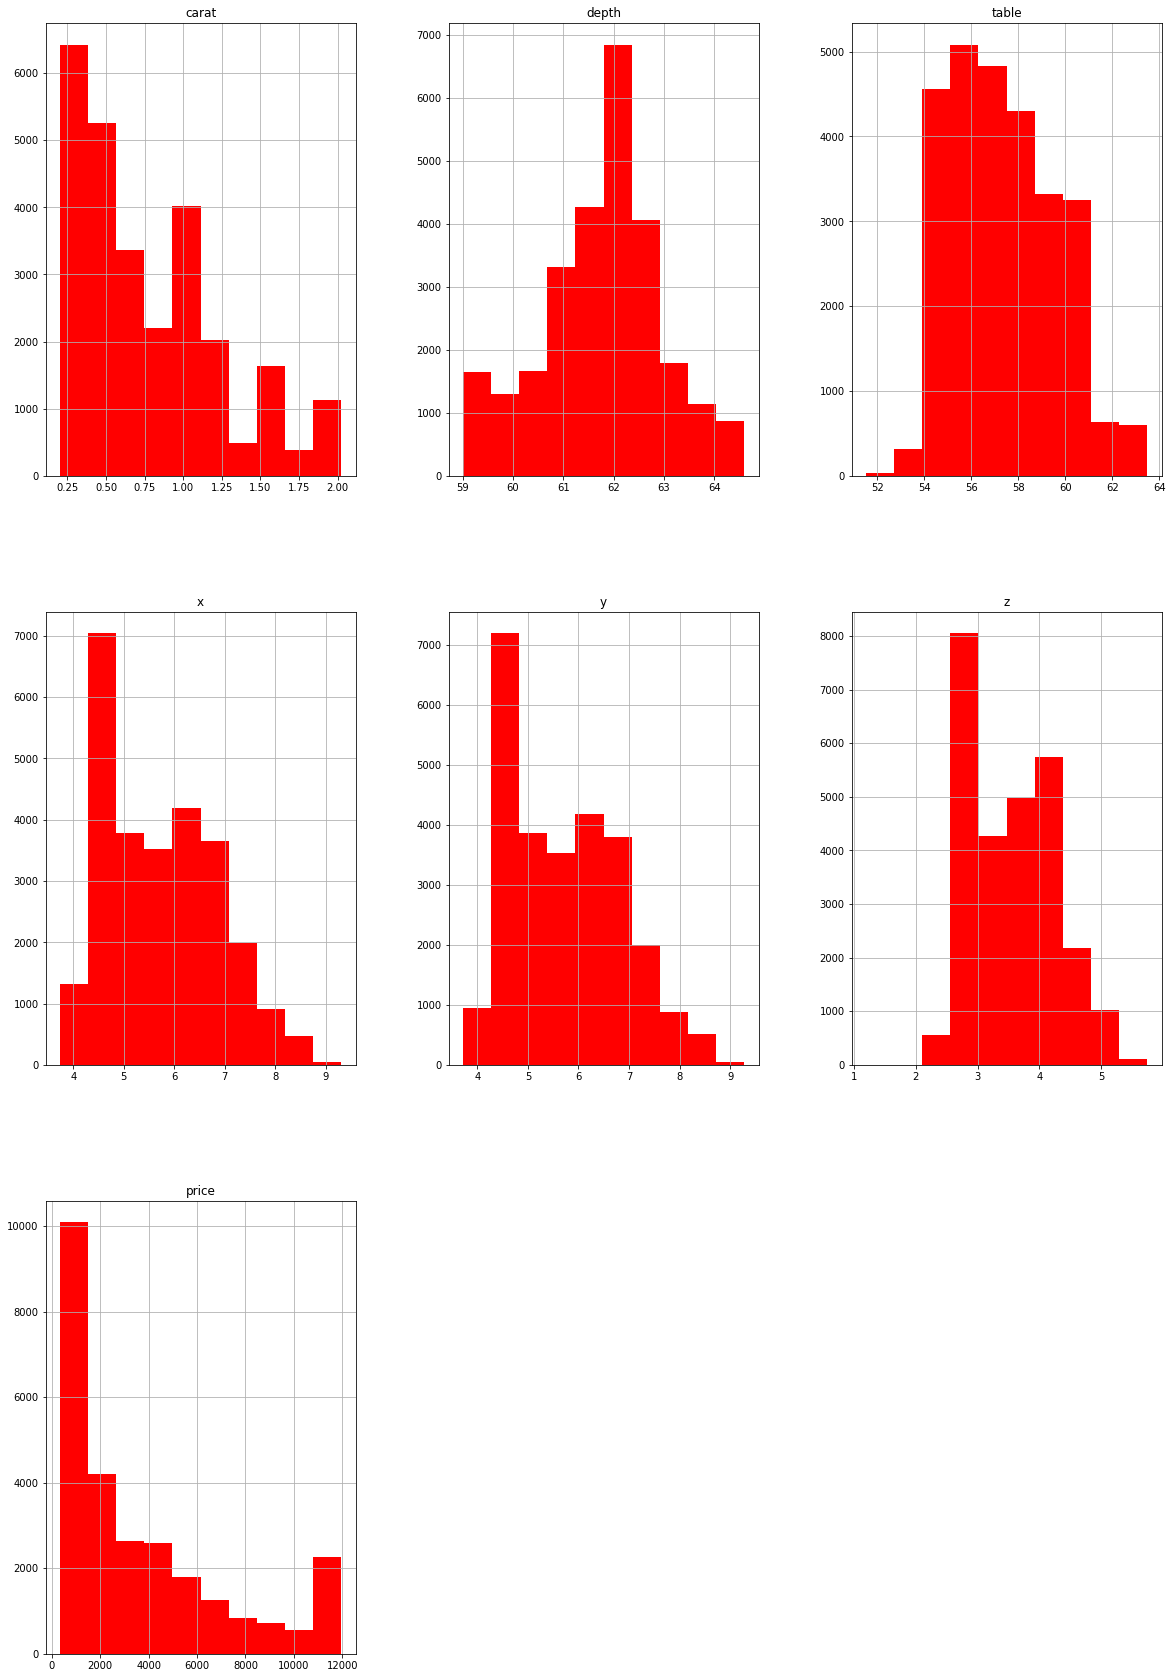

In [ ]:
#Checking distribution of the variables
df1.hist(figsize=(20,30),color='Red');

In [ ]:
#Checking skewness of the variables
df1.skew()

carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

**Inference**
* Of all the variables only depth is left skewed and carat and price are highly right skewed.

## **Multivariate Analysis**

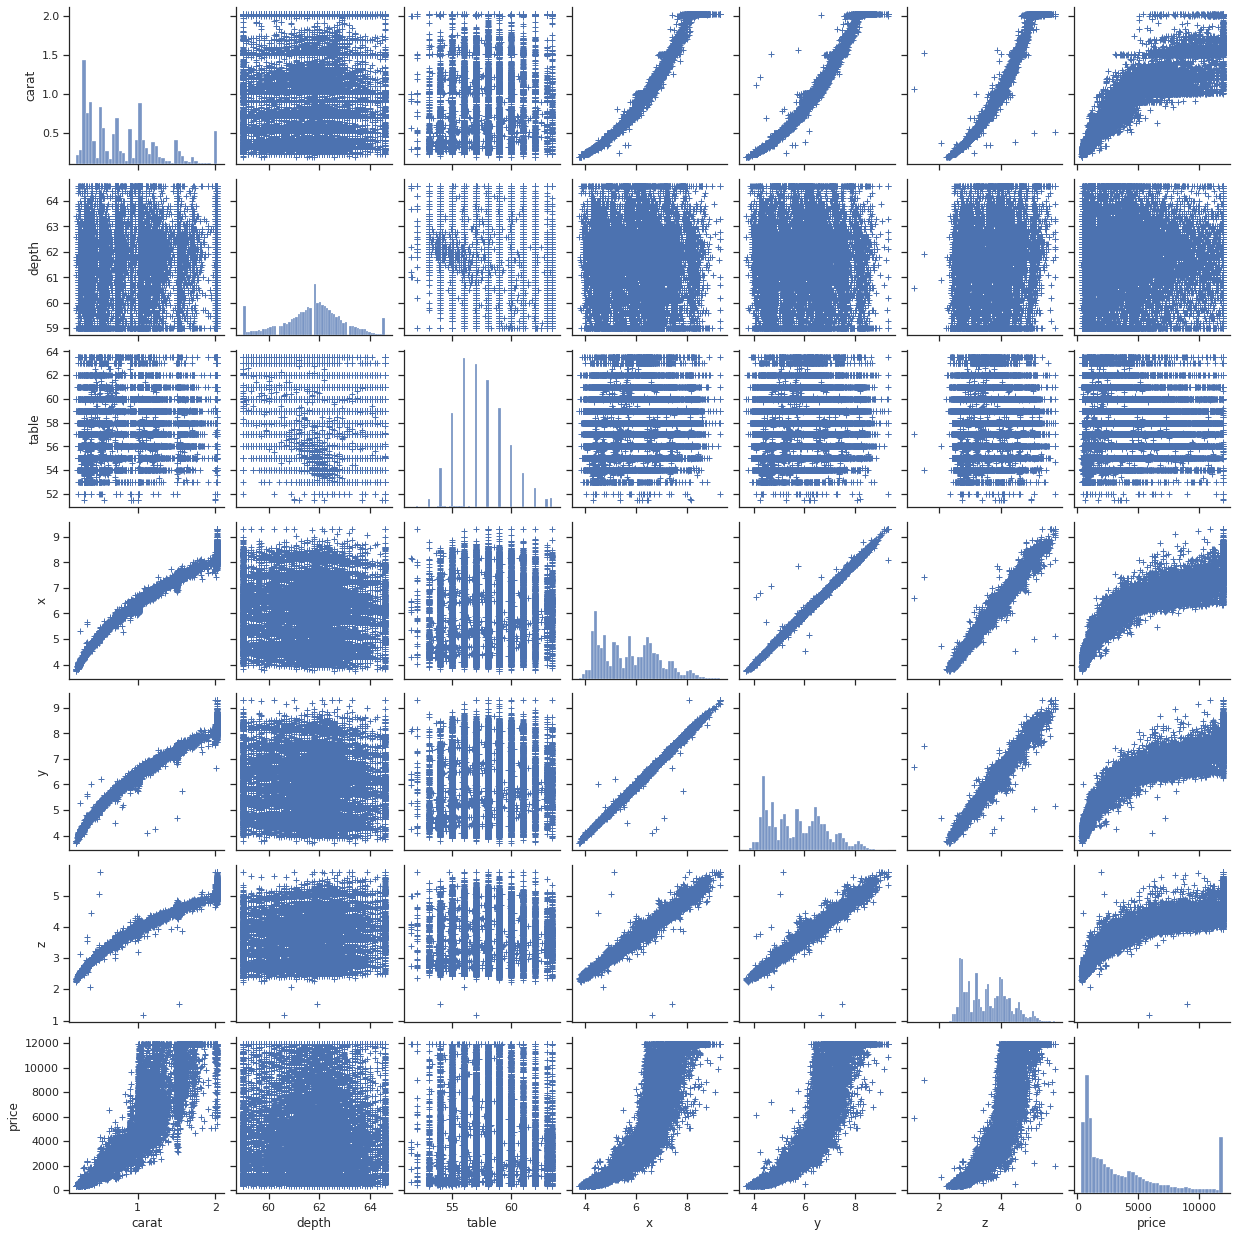

In [ ]:
import seaborn as sns
sns.pairplot(df1[cols],plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=True))
plt.show()

Inference
* Carat, X, Y and  Z has positive linear relationship between them.

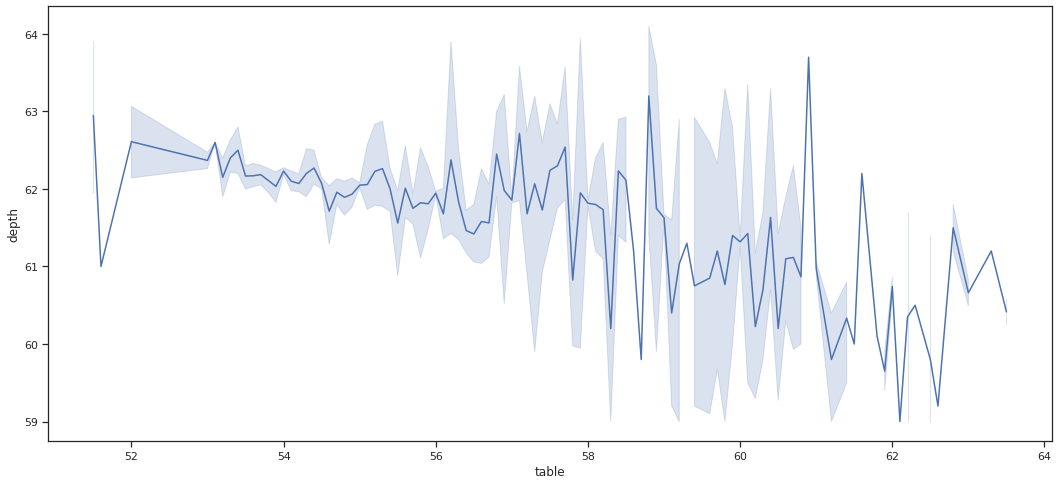

In [ ]:
# realtionship between table and depth
plt.figure(figsize=(18,8))
sns.lineplot(x=df1.table,y=df1.depth,palette='rainbow');

Inference
* Table and Depth of the diamond has an inverse relationship.

<Figure size 1296x576 with 0 Axes>

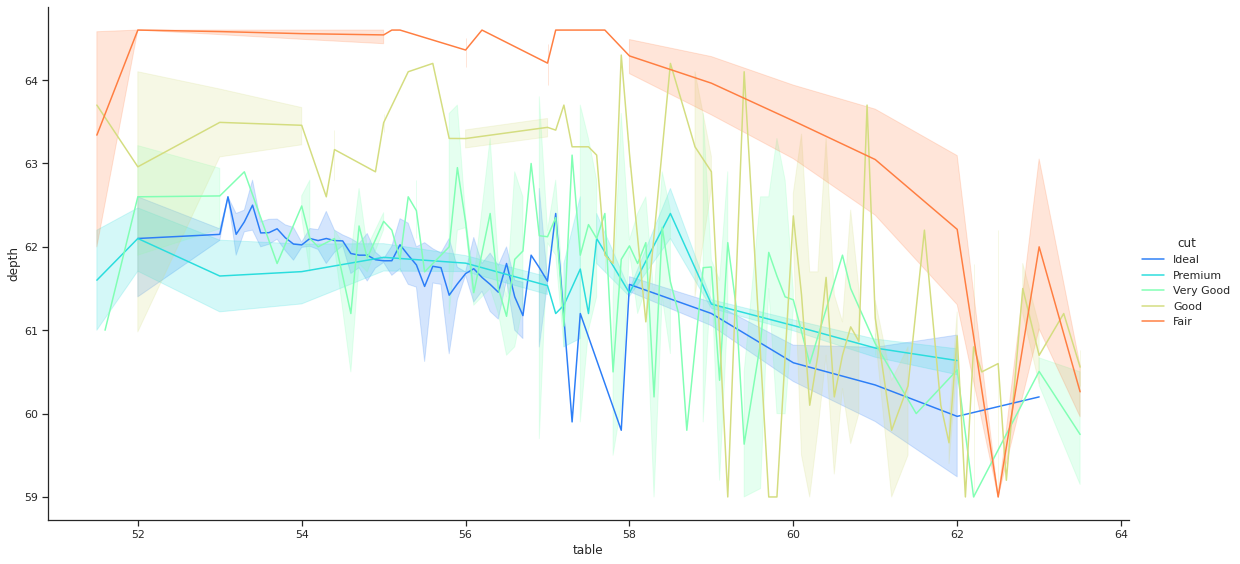

In [ ]:
plt.figure(figsize=(18,8))
sns.relplot(data=df1,x="table", y="depth",hue='cut',kind="line", palette="rainbow",height=8,aspect=2, facet_kws=dict(sharex=False))
plt.show()

Inference
* Of all the cut type , Good Cut diamond has higher variations in table and Depth of the daimond as compared to other cuts.






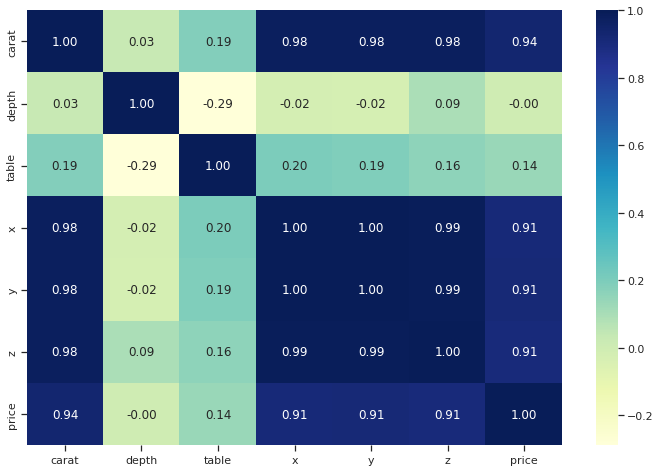

In [ ]:
# Correlation map
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap="YlGnBu")
plt.show()


**Inferences**
* Carat, x, y, z and price are highly correlated with each other.
* Depth has negative correlation with table,x, y and price.
* Table has no high correlation with any variable.


In [ ]:
#How each feature affects the price of diamonds
correlations = df1.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth   -0.000845
Name: price, dtype: float64

**Inference**
* Most features are correlated with the price of Diamond but  "depth" has a negligible correlation (<1%).

**EDA for Categorical variable.**

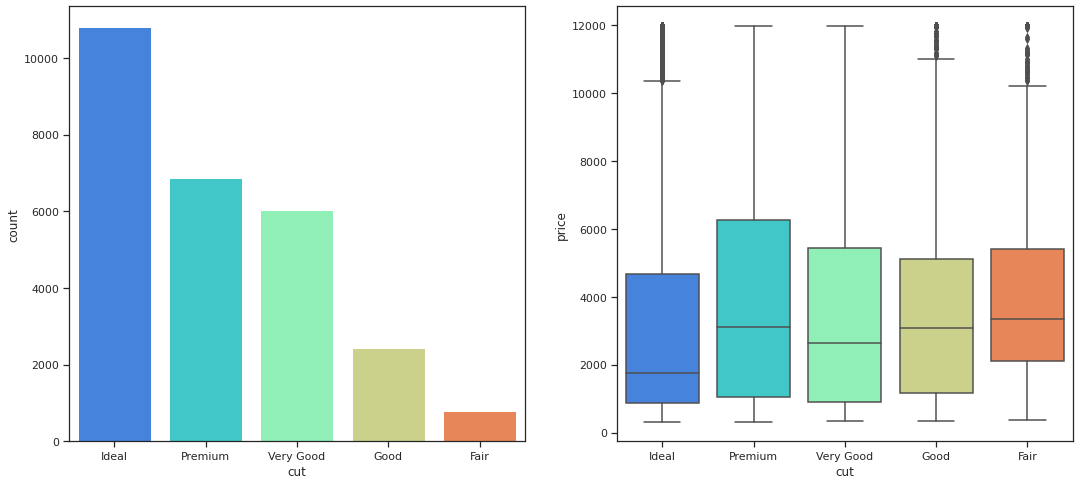

In [ ]:
# EDA for categorical columns 'CUT'.
fig, axes = plt.subplots(1, 2,figsize = (18,8))
sns.countplot('cut', data=df1,palette='rainbow',ax=axes[0])
sns.boxplot(x='cut', y='price',  data=df1,palette='rainbow',ax=axes[1]);

#sns.kdeplot( data=df1, x="price", hue="cut",fill=True, common_norm=False, palette="rainbow",alpha=.5, linewidth=0.8);


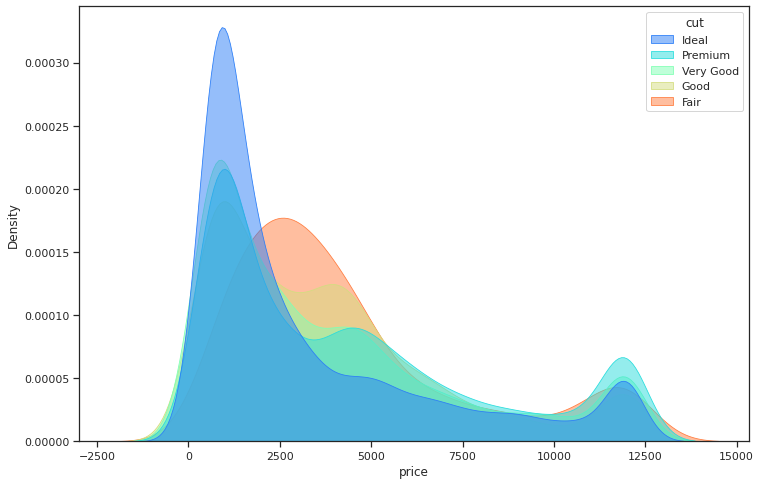

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot( data=df1, x="price", hue="cut",fill=True, common_norm=False, palette="rainbow",alpha=.5, linewidth=0.8);

Inferences
* The majority of the diamonds are of Ideal cut followed by Premium, Very Good Cut, Good and Fair.
* The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut, Good , Ideal and Fair.
* The distribution of the price with respect to cut of the diamond is not too much overlapping. 






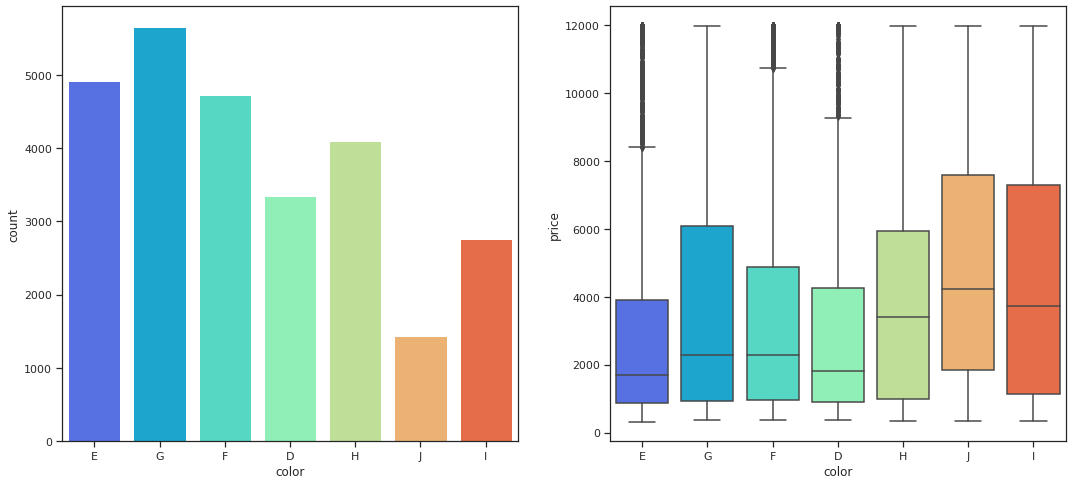

In [ ]:
#EDA for categorical column 'Color'.
fig, axes = plt.subplots(1, 2,figsize = (18,8))
sns.countplot(x='color', data=df1 ,palette='rainbow',ax=axes[0]);
sns.boxplot(x='color', y='price', palette='rainbow',data=df1,ax=axes[1]);

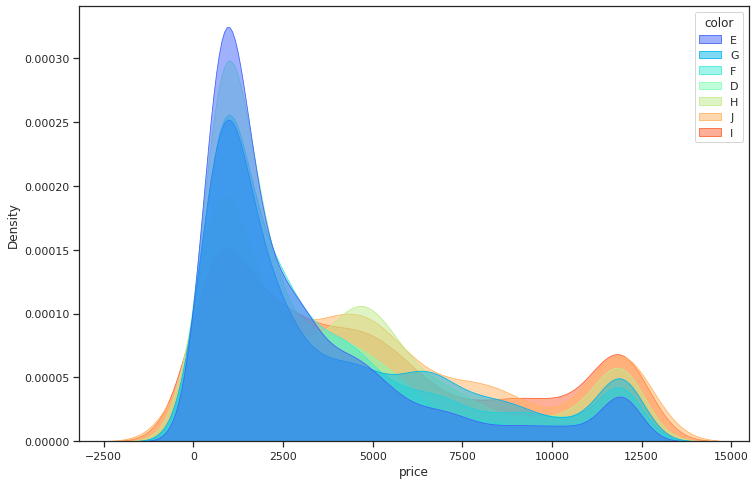

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot( data=df1, x="price", hue="color",fill=True, common_norm=False, palette="rainbow",alpha=.5, linewidth=0.8);

**Inferences**
* Majority of the diamonds are of colour "G" followed by "E" and "F".
* Pricewise  "J" is the costliest followed by "I","H","G". 
* Change in price with respect to colour has certain differences in the distribution.


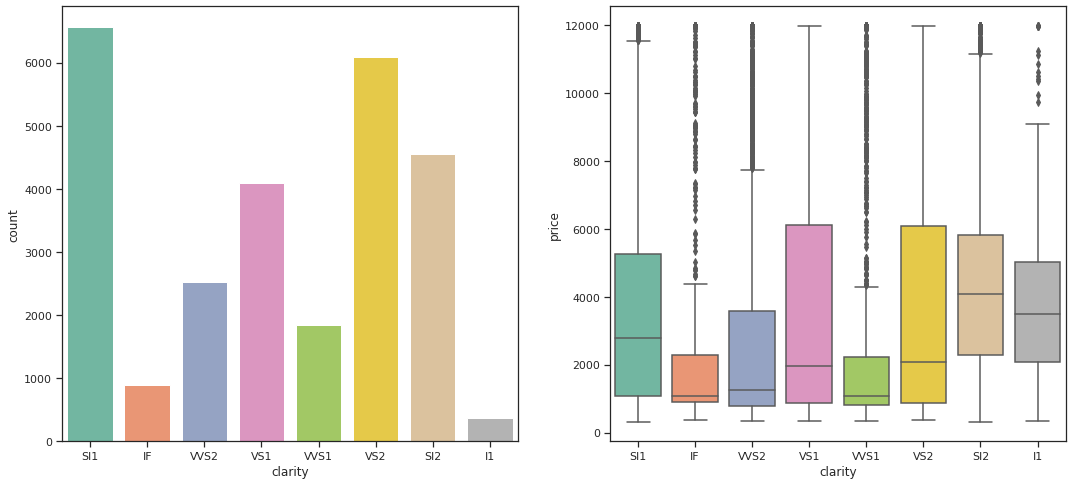

In [ ]:
# EDA for categorical columns 'Clarity'.
fig, axes = plt.subplots(1, 2,figsize = (18,8))
sns.countplot('clarity', data=df1,palette='Set2', ax = axes[0])
sns.boxplot(x='clarity', y='price', palette='Set2',data=df1, ax=axes[1]);

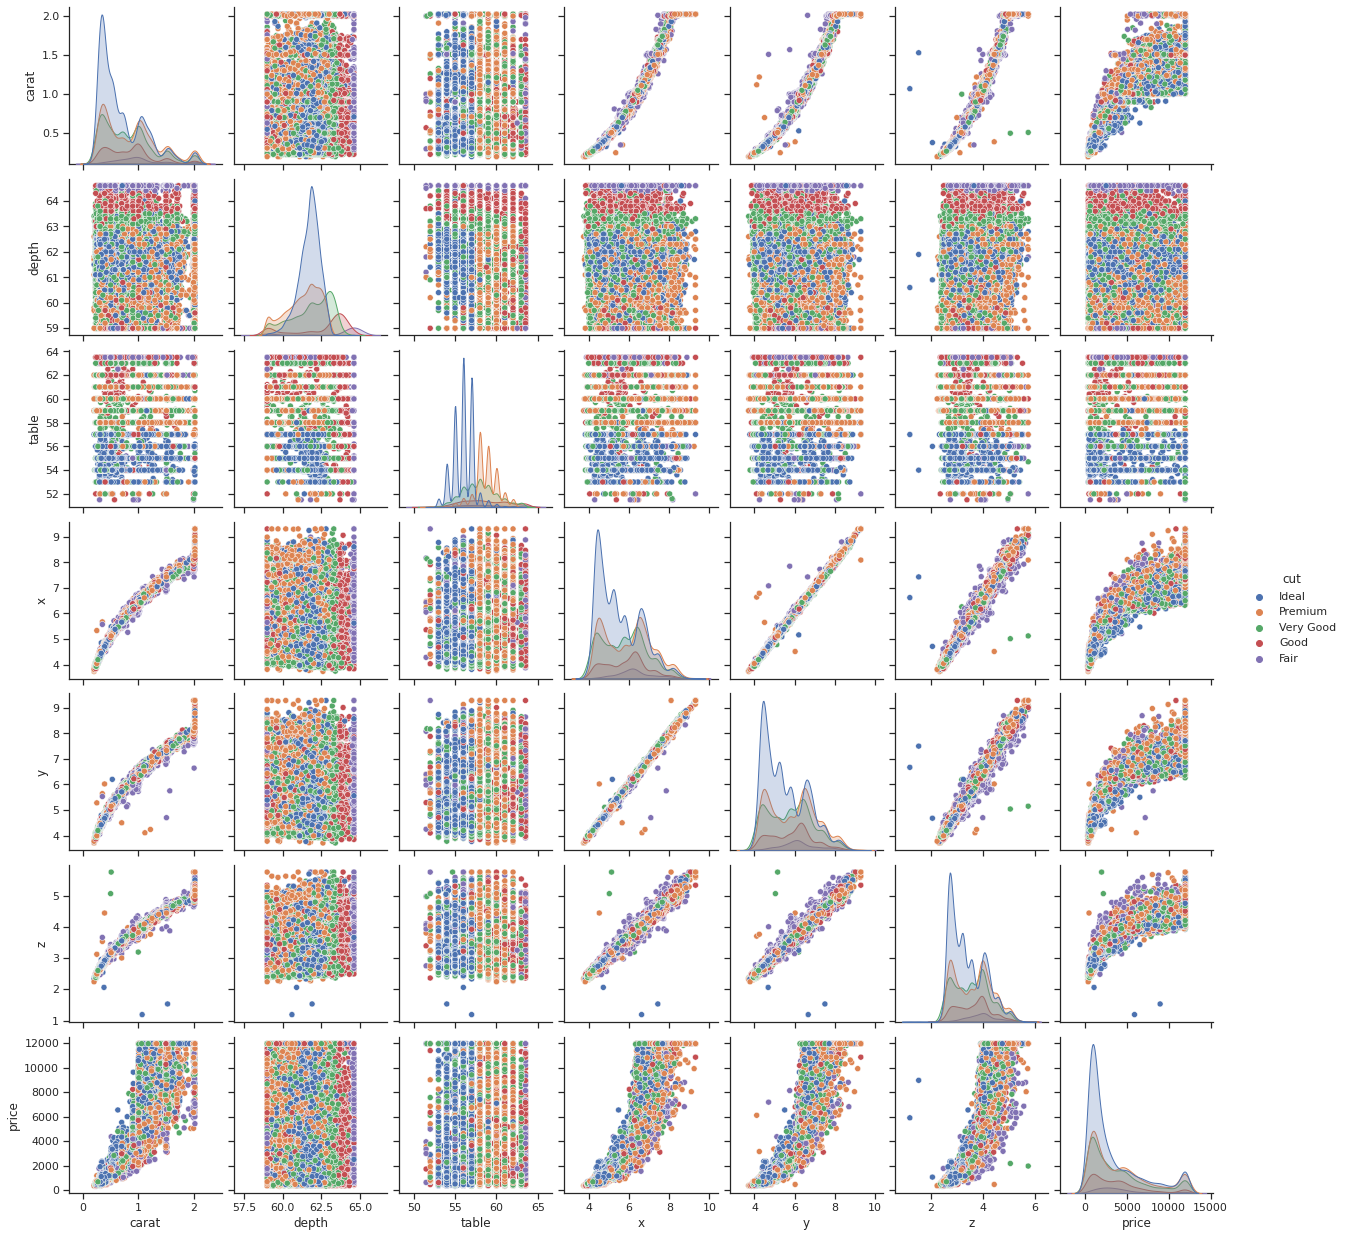

In [ ]:
sns.pairplot(df1, hue = 'cut')
plt.show()